In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the iris dataset
iris=datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# both the data and the target variable are given in an array format
type(iris.data),type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [7]:
# the target variable has certain values 0=> setosa ,1=> versicolor , 2=> virginica 
# so the target variable will contain one of these values in each column of it
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# the actual values for the target variable
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
x=iris.data
y=iris.target
df=pd.DataFrame(x,columns=iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


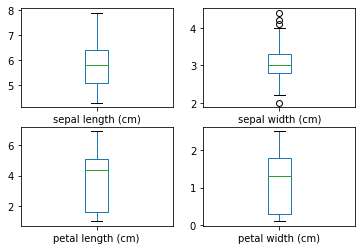

In [12]:
# create box and whisker plots of each variable in the dataset
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

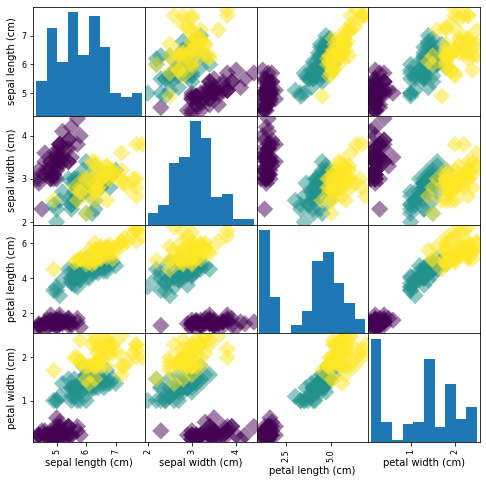

In [13]:
pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8],s=150, marker = 'D')

We can see that there is a positive correlation between the petal width and petal length

Using scikit-learn to fit a classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# we use the most closest 6 labeled data
knn = KNeighborsClassifier(n_neighbors=6)

# fit the model
knn.fit(iris['data'], iris['target'])


KNeighborsClassifier(n_neighbors=6)

In [15]:
# New unlabelled data, we will predict its labels
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
[5.7, 2.6, 3.8, 1.3],
[4.7, 3.2, 1.3, 0.2]])

In [17]:
# predict the label for the new unlabelled data: prediction
prediction = knn.predict(X_new)

print('Prediction: {}',format(prediction))

Prediction: {} [1 1 0]


As we see those are the labels for the new data as predicted by the model, so the first and second ones are versicolor and the third one is setosa

In [18]:
boston=pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [19]:
# Creating feature and target arrays
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values


we will Predict the house value using a single feature

In [20]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [21]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)


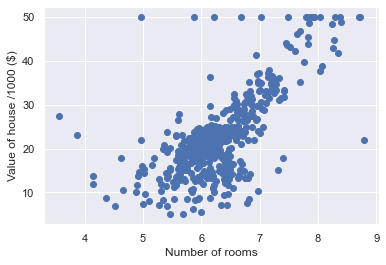

In [23]:
# Plotting house value vs. number of rooms
sns.set()
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [24]:
# Fitting a regression model
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_rooms, y)

prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1, 1)

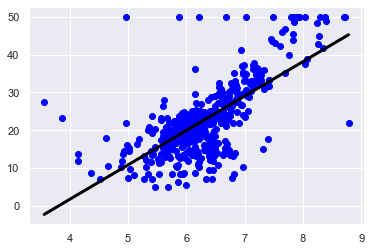

In [25]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
plt.show()
